# World Population Analysis

This project explores the growth of the world population from 1950 to the present. The goal is to train a linear regression model to predict population growth based on historical data. We begin by importing the necessary libraries.


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import requests
from bs4 import BeautifulSoup
from io import StringIO
%matplotlib inline


## Load Dataset

We load the dataset from the Worldometers website, which provides annual world population figures.


In [101]:
data_set_url = 'https://www.worldometers.info/world-population/world-population-by-year/'
response = requests.get(data_set_url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
table_html = str(table)
dfs = pd.read_html(StringIO(table_html))
df = dfs[0]


## Data Preprocessing

The data includes several columns that are not needed for our analysis. We focus on the 'Year' and 'World Population' columns, and prepare the data for our regression model.


In [102]:
world_population_df = df.loc[:72,:]
world_population_df = world_population_df.drop(columns=['Yearly Change', 'Net Change', 'Density (P/Km²)'])
world_population_df['log population'] = np.log(world_population_df['World Population'])

## Initial Model Training and Testing

Initially, the dataset is split based on the year: using data from 1951 to 1988 for training and from 1989 to 2023 for testing. This approach aims to evaluate the model's performance on unseen data.


In [103]:
world_population_df_to_1987 = world_population_df.loc[36:,:]
world_population_df_to_2023 = world_population_df.loc[:35,:]

x_train = world_population_df_to_1987[['Year']]
y_train = world_population_df_to_1987['log population']

x_test = world_population_df_to_2023[['Year']]
y_test = world_population_df_to_2023['log population']

model = LinearRegression().fit(x_train, y_train)

y_pred_test = model.predict(x_test)
predictions_test = np.exp(y_pred_test)
actual_test = np.exp(y_test)

## Visualization

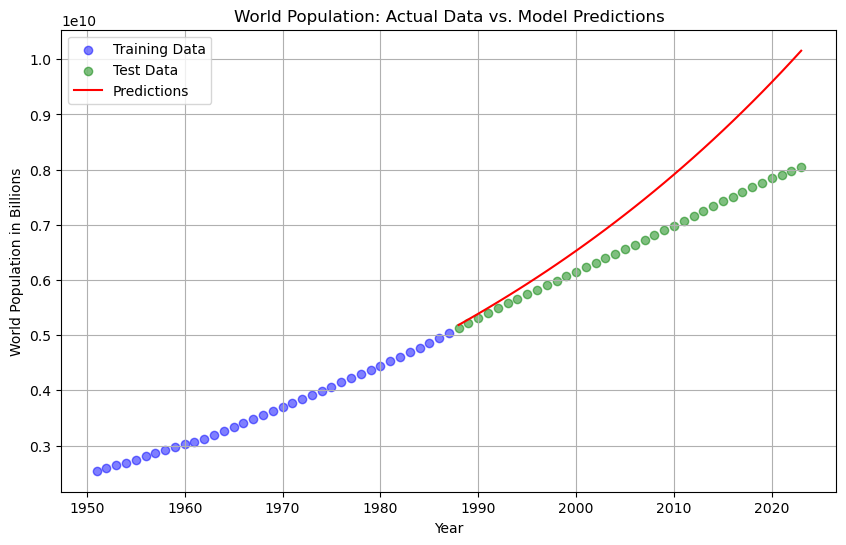

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, np.exp(y_train), color='blue', label='Training Data', alpha=0.5)
plt.scatter(x_test, actual_test, color='green', label='Test Data', alpha=0.5)
plt.plot(x_test, predictions_test, 'r-', label='Predictions', markersize=8)

plt.title('World Population: Actual Data vs. Model Predictions')
plt.xlabel('Year')
plt.ylabel('World Population in Billions')
plt.legend()
plt.grid(True)
plt.show()

## Refined Approach

After the initial attempt, it was clear that using a different training/testing split could potentially improve the model accuracy, due to the initial inaccurate graph representation.


### Model Evaluation

Implementing a loop to evaluate model performance with different subsets of the data.

In [105]:
r_squared = []

for i in range(72,94):
    world_population_df = df.loc[:i,:]
    world_population_df = world_population_df.drop(columns=['Yearly Change', 'Net Change', 'Density (P/Km²)'])
    world_population_df['log population'] = np.log(world_population_df['World Population'])

    X = world_population_df[['Year']]
    y = world_population_df['log population']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

    model = LinearRegression().fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    predictions_test = np.exp(y_pred_test)
    actual_test = np.exp(y_test)

    r_squared.append(r2_score(actual_test, predictions_test))

### Visualization of R² Values
Visualizing the R² values helps to understand the model's performance over time and with different data splits.

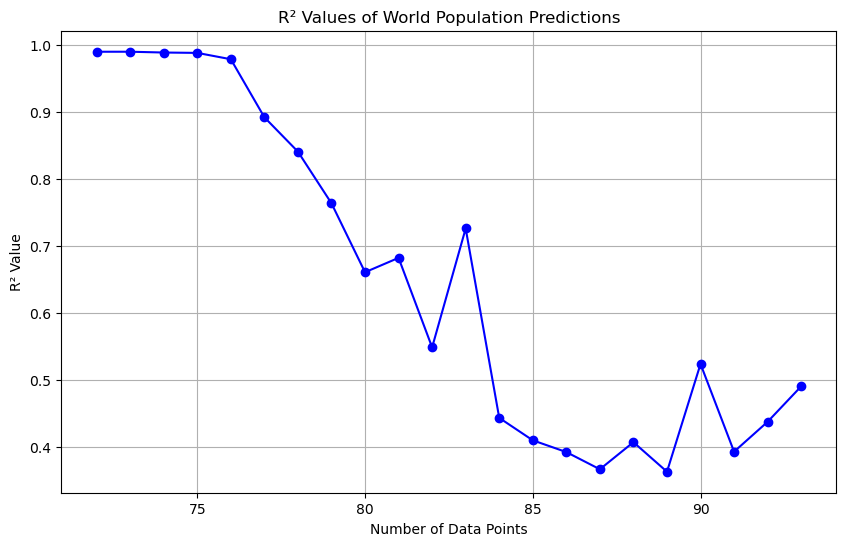

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(72,94)), r_squared, marker='o', linestyle='-', color='blue')
plt.title('R² Values of World Population Predictions')
plt.xlabel('Number of Data Points')
plt.ylabel('R² Value')
plt.grid(True)
plt.show()

### Analysis and Conclusion

The analysis of the decline in R² value in historical population data and the evaluation of the linear regression model over historical data provide insights into the limitations and considerations when modeling complex datasets such as world population. It emphasizes the importance of data quality, model suitability, and the dynamic nature of population growth patterns over time.

### Evaluation of Linear Regression Model Over Historical Data

This analysis investigates the predictive performance of a linear regression model on world population data spanning from 1927 to 5000 BCE. The evaluation focused on the variation in the coefficient of determination (R²) values across different historical periods, providing insights into the model's accuracy in predicting population trends.

**Key Observations:**
- The R² values remain exceptionally high (>0.9) for data points between 72 to 77, corresponding to the years from 2023 to 1951 and extending to 1700. This indicates a strong predictive capability of the model for more recent historical periods, where population growth patterns are more consistent and data reliability is higher.
- A notable decrease in R² values is observed as the analysis extends into earlier periods, post-1700. This decline highlights the challenges in predicting population trends during times of increased historical volatility and data scarcity.

**Methodological Note:**
For reproducibility and consistency in data analysis, a specific seed was utilized during the train-test split process:
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



## Final Evaluation of the Linear Regression Model
A detailed evaluation of the linear regression model's performance using historical world population data.

In [107]:
# Final Model Evaluation
world_population_df = df.loc[:72,:]
world_population_df = world_population_df.drop(columns=['Yearly Change', 'Net Change', 'Density (P/Km²)'])
world_population_df['log population'] = np.log(world_population_df['World Population'])

X = world_population_df[['Year']]
y = world_population_df['log population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

model = LinearRegression().fit(X_train, y_train)
y_pred_test = model.predict(X_test)
predictions_test = np.exp(y_pred_test)
actual_test = np.exp(y_test)

# Metric Calculations
mae = mean_absolute_error(actual_test, predictions_test)
mse = mean_squared_error(actual_test, predictions_test)
rmse = np.sqrt(mse)
r2 = r2_score(actual_test, predictions_test)

# Metrics Display
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 144214867.82427523
Mean Squared Error (MSE): 2.7308562776056576e+16
Root Mean Squared Error (RMSE): 165253026.52616253
R-squared (R²): 0.9901151043989102


## Visualization of Final Model Predictions
Visualizing the final model predictions alongside the actual data to assess fit and accuracy.

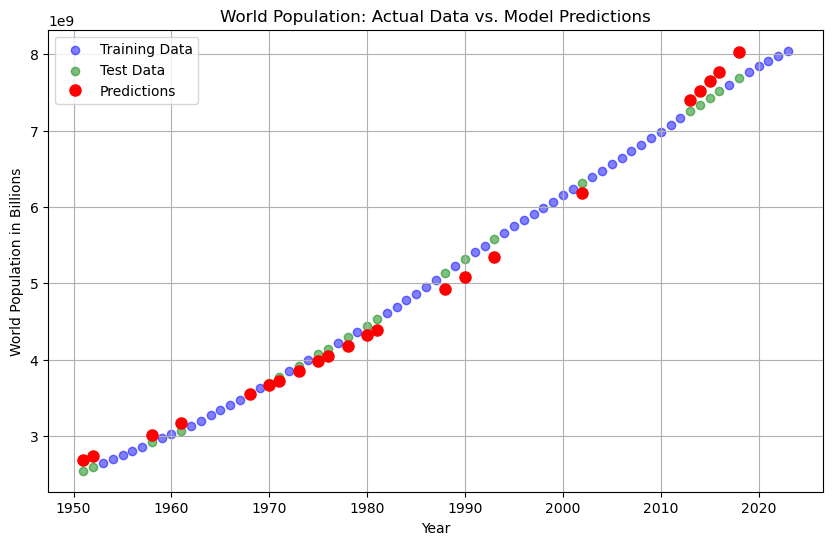

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, np.exp(y_train), color='blue', label='Training Data', alpha=0.5)
plt.scatter(X_test, actual_test, color='green', label='Test Data', alpha=0.5)
plt.plot(X_test, predictions_test, 'ro', label='Predictions', markersize=8)

plt.title('World Population: Actual Data vs. Model Predictions')
plt.xlabel('Year')
plt.ylabel('World Population in Billions')
plt.legend()
plt.grid(True)
plt.show()

## Final Model Evaluation

The evaluation of the final model for predicting the world population presents a highly accurate and reliable framework, as reflected by the statistical measures of its performance. The R-squared (R²) value of ~ 0.99 indicates an exceptional level of model accuracy, meaning that nearly 99% of the variance in the population data can be explained by the model. This high R² value underscores the model's efficacy in capturing and predicting the dynamics of world population growth.

**Performance Metrics:**
- **Mean Absolute Error (MAE):** 144,214,867- This metric signifies the average absolute difference between the predicted values and the actual values, providing a clear measure of prediction accuracy. The relatively low MAE suggests that the model's predictions are closely aligned with real-world data.
- **Mean Squared Error (MSE):** 2.7e+16 - MSE quantifies the average of the squares of the errors. Despite the large number due to the squaring of errors, considering the scale of population figures, the MSE indicates a strong model performance with low error margins.
- **Root Mean Squared Error (RMSE):** 165,253,026 - RMSE provides a measure of the model's prediction error in the same units as the response variable. The low RMSE relative to the global population scale further validates the model's precision in forecasting population numbers.

The accuracy metrics (MAE and RMSE) along with the high R² value demonstrate that the model is both precise and reliable in estimating the world population. It reflects the model's capability to provide insightful predictions that can be instrumental for planning and policy-making related to global demographic trends. Overall, the final model stands as a robust tool in the field of population forecasting, offering high reliability and insight into future population trends.
